In [1]:
#Part One ==> Loaded Needed Libraries and Read The Data & Make Describing For Data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
path = 'D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\Classification Example_1(Data).txt'
data = pd.read_csv(path ,header=None,names=['Exam 1','Exam 2','Admitted'])
print('\t\tData Is \n',data.head(20))
print('==='*40)
print('\t\tDescribing Data \n',data.describe())

		Data Is 
        Exam 1     Exam 2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
5   45.083277  56.316372         0
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
10  95.861555  38.225278         0
11  75.013658  30.603263         0
12  82.307053  76.481963         1
13  69.364589  97.718692         1
14  39.538339  76.036811         0
15  53.971052  89.207350         1
16  69.070144  52.740470         1
17  67.946855  46.678574         0
18  70.661510  92.927138         1
19  76.978784  47.575964         1
		Describing Data 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.

In [2]:
#Make Calssifier To Data Positive & Negative 
#Positive Is a List Contain All Values Positive That Represenetd By 1
#Negative Is a List Conatin All Negative Values That Represented By 0
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]
print('The Length Of Positive Data Is ==> ',len(positive))#The Length Of Positive Data Is ==>  60
print('The Lenght Of Negative Data Is ==> ',len(negative))#The Lenght Of Negative Data Is ==>  40
print('The Shape Of Positive Data Is ==> ',positive.shape)#The Shape Of Positive Data Is ==>  (60, 3)
print('The Shape Of Negative Data Is ==> ',negative.shape)#The Shape Of Negative Data Is ==>  (40, 3)
print('=='*40)
print('\t\tThe Positive Data(Admitted Student) Is \n',positive.head(10))
print('===='*40)
print('\t\tThe Negative Data(NotAdmiited Student) Is \n',negative.head(10))

The Length Of Positive Data Is ==>  60
The Lenght Of Negative Data Is ==>  40
The Shape Of Positive Data Is ==>  (60, 3)
The Shape Of Negative Data Is ==>  (40, 3)
		The Positive Data(Admitted Student) Is 
        Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
		The Negative Data(NotAdmiited Student) Is 
        Exam 1     Exam 2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0
11  75.013658  30.603263         0
14  39.538339  76.036811         0
17  67.946855  46.678574         0
20  67.372028  42.838438         0
22  50.53478

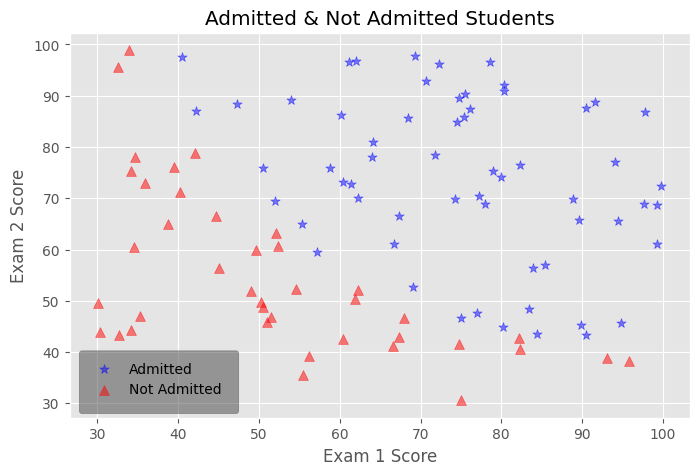

In [3]:
#Make Plots To Data For Poistive(Admitted) & Negative (Not Admitted)
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(8,5))
ax.set(title ='Admitted & Not Admitted Students',xlabel='Exam 1 Score',ylabel='Exam 2 Score')
ax.scatter(positive['Exam 1'],positive['Exam 2'],marker='*',s=50,color='blue',alpha=0.5,label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,marker='^',color='red',alpha=0.5,label='Not Admitted')
ax.legend(loc='lower left',frameon=True,shadow=True,fancybox=True,framealpha=0,borderpad=1)

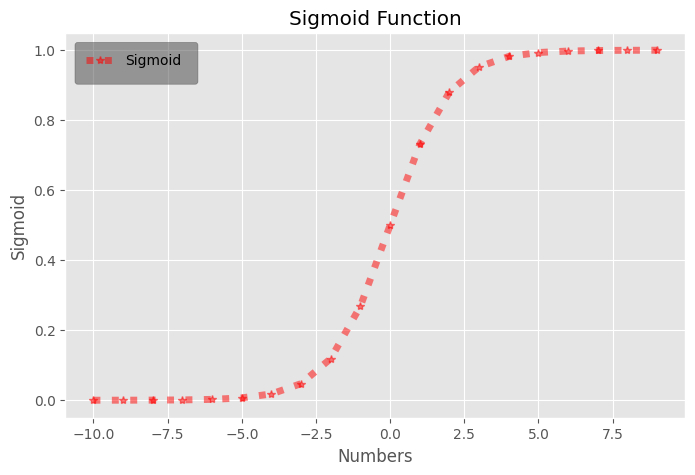

In [4]:
#Make Sigmoid Function And Draw Plots 
def sigmoid(var):return 1 /(1+ np.exp(-var))
#Create Numbers Because Make Test On Sigmoid Function 
numbers =np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(8,5))
plt.style.use('ggplot')
ax.set(title='Sigmoid Function',xlabel='Numbers',ylabel='Sigmoid')
ax.plot(numbers,sigmoid(numbers),linewidth=5,linestyle='dotted',marker='*',alpha=0.5,color='red',label='Sigmoid')
ax.legend(loc='upper left',frameon=True,fancybox=True,shadow=True,framealpha=0,borderpad=1)

In [5]:
#Create Cost Function Formula 
def cost_function(thetav,xv,yv):
    theta_values=np.matrix(thetav)#Convert Values Of Theta To Matrix Becuasue To Easily With Treatment
    x_values=np.matrix(xv)#Convert Values Of X To Matrix Becuase To Easily With Treatment
    y_values=np.matrix(yv)#Convert Values Of Y To Matrix Becuase To Easily With Treatment
    first=np.multiply(- y_values,np.log(sigmoid(x_values * theta_values.T)))
    second=np.multiply((1- y_values) , np.log(1-(sigmoid(x_values * theta_values.T))))
    return np.sum(first - second) / len(x_values)

In [6]:
path = 'D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\Classification Example_1(Data).txt'
data = pd.read_csv(path ,header=None,names=['Exam 1','Exam 2','Admitted'])
#Add Values Of X0 That Equal = 1
data.insert(0,'Ones',1)
print('\t\t The New Data After Add The Value Of X0 Is \n',data.head(15))
print('***'*40)
#To divide my data to ( Two Types) 
#One Type ==> Training Data 
#Two Type ==> Traget Data 
cols=data.shape[1]
x_training_data=data.iloc[:,0:cols-1]
x_ytarget_data=data.iloc[:,cols-1:cols]
print('\t\t The Training Data Is \n',x_training_data.head(5))
print('***'*20)
print('\t\t The Target Dat Is \n',x_ytarget_data.head(5))
print('***'*20)
#Convert My Data To Matrix By Using Numpy Library Becuase To Easily With Traetment
xm=np.matrix(x_training_data.values)
ym=np.matrix(x_ytarget_data.values)
theta=np.zeros(3)
print('\t\tThe Training Data After Convert To Matrix Is \n',xm[0:10,:])
print('***'*20)
print('\t\tThe Target Data After Convert To Matrix Is \n',ym[0:10,:])
print('***'*20)
#Recall The Function Is Called Cost Function Becuase Calculate The Value Of Cost Error Function Before Make Updates For Values
#Of Theta If The Cost Function Value Is Not suitable
thiscost=cost_function(theta,xm,ym)
print('The Cost Function Is = ',thiscost)#The Cost Function Is =  0.6931471805599453


		 The New Data After Add The Value Of X0 Is 
     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
5      1  45.083277  56.316372         0
6      1  61.106665  96.511426         1
7      1  75.024746  46.554014         1
8      1  76.098787  87.420570         1
9      1  84.432820  43.533393         1
10     1  95.861555  38.225278         0
11     1  75.013658  30.603263         0
12     1  82.307053  76.481963         1
13     1  69.364589  97.718692         1
14     1  39.538339  76.036811         0
************************************************************************************************************************
		 The Training Data Is 
    Ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552


In [7]:
#Create Cost Function Method 
def gradient_descent(thetav,xv,yv):
    theta_values=np.matrix(thetav)
    x_values=np.matrix(xv)
    y_values=np.matrix(yv)
    parameters=int(theta_values.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(x_values * theta_values.T) - y_values
    for i in range(parameters):
        term =np.multiply(error , x_values[:,i])
        grad[i] = np.sum(term) / len(x_values)
        print('grad[',i,']\n',grad[i])
    return grad

In [8]:
#Loaded Scipy Libraries Becuase To Calculate The Minimum Value For Cost Function By Used Gradient Descent
import scipy.optimize as opt 
result = opt.fmin_tnc(func=cost_function,x0=theta,fprime=gradient_descent,args=(xm,ym))
print('==='*20)
print(result)

grad[ 0 ]
 -0.1
grad[ 1 ]
 -12.009216589291151
grad[ 2 ]
 -11.262842205513596
grad[ 0 ]
 -0.09999428434588042
grad[ 1 ]
 -12.008824975404139
grad[ 2 ]
 -11.262449738643062
grad[ 0 ]
 0.06290371125474206
grad[ 1 ]
 -0.879771387827355
grad[ 2 ]
 -0.10551097869796781
grad[ 0 ]
 0.06290371134756138
grad[ 1 ]
 -0.8797713805317686
grad[ 2 ]
 -0.10551097230958341
grad[ 0 ]
 0.1527429061260236
grad[ 1 ]
 6.1102888312201795
grad[ 2 ]
 6.046792560254557
grad[ 0 ]
 0.1527429057688487
grad[ 1 ]
 6.110288833167015
grad[ 2 ]
 6.046792539189796
grad[ 0 ]
 0.06727205758744742
grad[ 1 ]
 4.253053303360564
grad[ 2 ]
 0.6584759971170161
grad[ 0 ]
 0.06727203696886896
grad[ 1 ]
 4.253052027038786
grad[ 2 ]
 0.6584746676060529
grad[ 0 ]
 -0.005994348363695466
grad[ 1 ]
 -0.42869873989830765
grad[ 2 ]
 -4.08451891269603
grad[ 0 ]
 -0.005994347713208207
grad[ 1 ]
 -0.4286986521116604
grad[ 2 ]
 -4.084518854487677
grad[ 0 ]
 0.0049213348360194874
grad[ 1 ]
 1.1314925958809914
grad[ 2 ]
 -3.0811053190977122
gr

In [9]:
#Calculate The Cost Function After Make Optimizing for Minimum Vakues Of Theta 
cost_after_optimize=cost_function(result[0],xm,ym)
print('The Value Of Cost After Optimize Is = ',cost_after_optimize)
#The Value Of Cost After Optimize Is =  0.20349770158947447

The Value Of Cost After Optimize Is =  0.20349770158947447


In [10]:
#Make Function To Calculate The Accuracy 
def predict(theta,x):
    probability=sigmoid(x * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
#=========================================================
theta_min=np.matrix(result[0])
predictions=predict(theta_min,xm)
print('The New Predicitions Is ==> \n',predictions)
print('==='*60)
correct=[1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a,b) in zip (predictions,ym)]
accuracy = (sum(map(float,correct))% len(correct))
print('The Accuracy Is = {0} % '.format(accuracy))

The New Predicitions Is ==> 
 [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
The Accuracy Is = 89.0 % 
